# Project 2 - OCR

The goal of this project is to extract data from video and display it in meaningful ways. The first video we will extract data from is the launch of the DragonA spaceship from SpaceX. We will be extracting the speed and altitude data from the launch and plotting it. The second video is a clip from a sports panel. We will extract the text at the bottom of the banner to see if we can get any meaningful information.

The tools we are going to use for this project is ffmpeg to extract each frame from the videos and crop it to the information we want, gimp to find the correct crop coordinates in the frames, tesseract to do the optical character recognition (OCR), and python to clean the data and plot it in an informative way. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import math
import random
%matplotlib inline

In [2]:
notDecimal = []
def readGood(name):
    i = 0
    with open(name, "r") as file:
        lines = file.readlines()
        for l in lines:
            i = i + 1
            s = l.strip()
            if s.isdecimal():
                yield i, float(s)
            else:
                notDecimal.append((i,s))
                

## Part 1
Extract the speed from the DragonA launch.

In [3]:
goods = readGood("output_speed.txt")

In [4]:
df = pd.DataFrame(goods, columns=["frame", "speed"])

In [5]:
df

,frame,speed
0,3,0.0
1,5,0.0
2,7,0.0
3,9,0.0
4,11,0.0
5,13,0.0
6,15,0.0
7,17,0.0
8,19,0.0
9,21,0.0


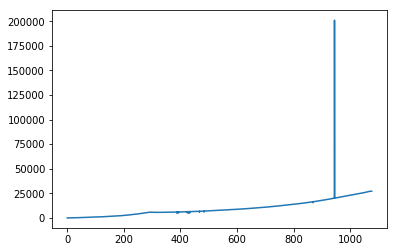

In [6]:
plt.plot(df.frame/30, df.speed)

In [7]:
ss = np.array(df.speed)

In [8]:
ds = np.abs(ss[0:-1] - ss[1:])

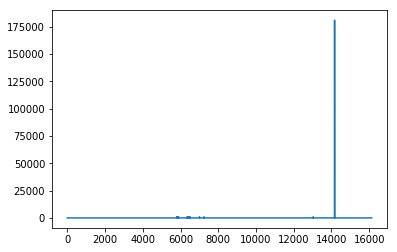

In [9]:
plt.plot(ds)

In [10]:
def dropOutliers(df, threshold):
    bad = []
    i = 0
    while i < 3:
        print("X")
        i += 1
        ss = np.array(df.speed)
        ds = np.abs(ss[0:-1] - ss[1:])
        outliers = np.where(ds > threshold)[0] + 1
        if len(outliers) == 0 or len(df) <= 2:
            return bad,df
        bad.extend(zip(list(df.frame[outliers]), list(ds[ds > threshold])))
        df = df.drop(outliers)
        df.index = range(len(df.index))
    return bad,df

In [11]:
bad,clean = dropOutliers(df, 4)

X
X
X


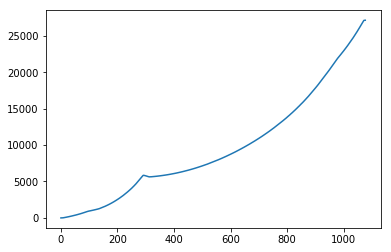

In [12]:
plt.plot(clean.frame/30, clean.speed)

This plotted quite nicely after a little cleaning and we can see the different stages the rocket went through during it's launch.

## Part 2
Extract altitude from the DragonA launch.

In [13]:
alts = []
i = 0
with open("output_alt.txt", "r") as file:
        lines = file.readlines()
        for l in lines:
            i = i + 1
            s = l.strip().replace(' ','')
            if s != '':
                alts.append((i,float(s)))

In [14]:
df = pd.DataFrame(alts, columns=["frame", "altitude"])

In [15]:
df

,frame,altitude
0,1,0.0
1,3,0.0
2,5,0.0
3,7,0.0
4,9,0.0
5,11,0.0
6,13,0.0
7,15,0.0
8,17,0.0
9,19,0.0


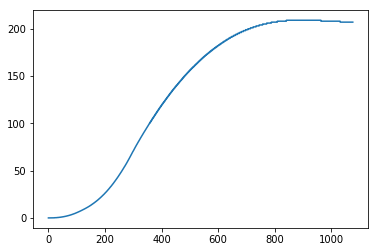

In [16]:
plt.plot(df.frame/30,df.altitude)

There was no cleaning of the data that needed to be done for the altitude, tesseract did a better job at reading these values than the speed. The data was then very easy to plot.

## Part 3
Extract the text from the banner in the sports panel video.
First we will extract the information in the top banners talking about March Madness.
Then we will extract the scores from the bottom banner.

In [17]:
sport1 = []
i = 0
with open("output_sport1.txt", "r") as file:
        lines = file.readlines()
        for l in lines:
            i = i + 1
            s = l.strip()
            if s != '':
                sport1.append((i,s))

In [18]:
import io
sport2 = []
i = 0
with io.open("output_sport2.txt", "r", encoding="utf-8") as file:
        lines = file.readlines()
        for l in lines:
            i = i + 1
            s = l.strip()
            if s != '':
                sport2.append((i,s))

In [19]:
sport1 = sport1[0:-2]

In [20]:
sport1info = np.array([i[1] for i in sport1]).reshape(-1)
sport2info = np.array([i[1] for i in sport2]).reshape(-1)
frames = np.array([i[0] for i in sport1]).reshape(-1)

In [21]:
df = pd.DataFrame({'frames':frames,'SportTitle':sport1info,'SportInfo':sport2info})
df

,frames,SportTitle,SportInfo
0,1,Duke (29-5) - No. 1 in East,"Zion Williamson in ACC Tournament: 27.0 PPG, 7..."
1,3,Duke (29-5) - No. 1 in East,BPI rank: 3; Chance to win title: 15% (3nd best)
2,5,Duke (29-5) - No. 1 in East,BPI rank: 3; Chance to win title: 15% (3nd best)
3,7,North Carolina Central (18-15) - No. 16 in Eas...,4th NCAA appearance (3rd straight)
4,9,North Carolina Central (18-15) - No. 16 in Eas...,0-3 all-time in NCAA Tournament
5,11,North Carolina Central (18-15) - No. 16 in Eas...,0-3 all-time in NCAA Tournament
6,13,North Carolina Central (18-15) - No. 16 in Eas...,66.3 PPG allowed (led MEAC)
7,15,North Carolina Central (18-15) - No. 16 in Eas...,66.3 PPG allowed (led MEAC)
8,17,North Carolina Central (18-15) - No. 16 in Eas...,BPI rank: 266: Chance to reach 2nd Rd: 0.2%
9,19,North Carolina Central (18-15) - No. 16 in Eas...,BPI rank: 266: Chance to reach 2nd Rd: 0.2%


This worked out better than I expected. Other than a few artifacts when the banners were in transition to new text, tesseract performed almost perfectly. At first I tried to extract the entire square, both parts at the same time, but tesseract did not perform well at all. I ended up running tesseract separately on both lines of text and it performed much better. This also made it easier to organize the text afterwards into this dataframe. 

In [22]:
scores = []
i = 0
with io.open("output_scores.txt", "r",encoding="utf-8") as file:
        lines = file.readlines()
        for l in lines:
            i = i + 1
            s = l.strip()
            if 'FINAL' in s:
                scores.append((i,s))

In [23]:
frames = [frame[0] for frame in scores]
scores = [frame[1] for frame in scores]

In [24]:
clean_scores = [i.replace(' | ',',').replace('|',',').replace(" I ",',').replace(' i ',',').split(',') for i in scores]
clean_scores = [i for i in clean_scores if len(i) == 4]

In [25]:
import itertools
clean_scores.sort()
clean_scores = list(k for k,_ in itertools.groupby(clean_scores))

In [26]:
df = pd.DataFrame(clean_scores,columns=['League','Team 1 Score','Team 2 Score',''])

In [27]:
df

,League,Team 1 Score,Team 2 Score,
0,"""cum",6 Campbell 45,IRadlord 57,FINAL
1,Hm,Iakers 123,Knicks 124,FINAL
2,MLS,Atl Utd 1,PhIIa l,FINAL
3,MLS,Atl Utd 1,Phlla 1,FINAL
4,MLS,Atl Utd 1,Phlla l,FINAL
5,MLS,NVCFC 2,mm 2,FINAL
6,MLS,‘roronto FC 3,New Englnd 2,FINAL
7,McAAw,6 Campbell 45,l Radlord 57,FINAL
8,NBA,"76"": 130",Bucks 125,FINAL
9,NBA,769rs 130,Bucks 125,FINAL


This implementation to extract the scores did not work out as well as the spacex or march madness did. Tesseract had lots of variance between reading the score separators which should have been "|" but often was read as "I" or "i" or some other character. This made parsing the information difficult. However, it did do a really great job on some of the scores, especially those in the NHL and NBA league. Something that might help is to crop out each section of information like we did with the other banner so that we do not need to worry about the separators, we can just combine it in python later. This would probably help tesseract get more accurate readings. I could also try to do some complicated regex expressions to fix what tesseract had problems with, but I think the other solution would work better and be less complicated.

## Summary

Overall, I think tesseract has a lot of potential if the image is cropped correctly and there is little to no variance in the images. When tesseract has little guess work on what it is interpreting it performs really well right out of the box, with little to no configuration. In the future when working with tesseract, I will crop each part of the text I want separately so tesseract can perform at peak capacity. 

This fits out framwork of understanding image data because tesseract is able to transform the raster images (grids of colors) to actual information (text) that we can save into a text file. After this information is readable we can use it however we would like. I am not sure how tesseract works when it doesn't use machine learning but my guess is it uses vector information from the raster images to make best guesses on what each character is in the image.

This was a fun project to actually apply OCR to useful videos. This was surprisingly easy to do with tesseract and I hope to use this tool in my future projects.